In [2]:
import os
from google.colab import drive
drive.mount('/gdrive', force_remount=True)
os.chdir('/gdrive/My Drive/IC_tales/code')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
import gzip as gz
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx
import disrupt as dr
import amutils as at
from difflib import get_close_matches

<br><h4>Carregando dados</h4><br>

In [0]:
#Carregando dados whosampled
with open('../data/whosampled_year_data.json') as who_sampled_file:
    who_sampled_json = json.load(who_sampled_file)

In [0]:
#Carregando dados do allmusic 
allmusic_json = at.load_am_json_data()

<br><h4>Construindo o grafo</h4><br>

In [0]:
G = at.build_graph_who_sampled(who_sampled_json)

In [0]:
print("Vértices: ", G.number_of_nodes(),"\nArestas: ",G.number_of_edges())

Vértices:  165377 
Arestas:  560498


<br><p>Essa parte serve apenas para economizar tempo visto que a função disruptions está adaptada para o allmusic</p><br>

In [0]:
for node in G.nodes:
    G.nodes[node]['genres'] = {}

<br><h4>Carregando a tabela de disruptividade do Whosampled.</h4><br>
<p>Essa tabela foi previamente calculada</p><br>

In [0]:
#G_table_whosampled = dr.compute_disruption(G)
G_table_whosampled = pd.read_csv('../data/G_table_whosampled_disruption.csv')

In [0]:
G_table_whosampled = G_table_whosampled.sort_values(by='disruption', ascending=False)

In [0]:
G_table_whosampled = G_table_whosampled.dropna().copy()

In [0]:
#As linhas abaxo estão comentadas pois a tabela salva já inclui o intervalo de confiança
#ci_g = dr.get_confidence_disruption(G_table_whosampled)
#G_table_whosampled['ci'] = 1-ci_g
G_table_whosampled = G_table_whosampled.rename(columns = {'Unnamed: 0':''})
G_table_whosampled.index = G_table_whosampled['']
G_table_whosampled = G_table_whosampled.drop(columns = '')
G_table_whosampled.head()

,ni_E,ni_D,ni,nj_E,nj_D,nj,nk_E,nk_D,nk,disruption,in,out,ci
,,,,,,,,,,,,,
1950s Housewife Tries LSD,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.1994
Trapp Family Singers,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.2627
Machiavel,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.2632
Karen Boddington,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.3253
Don't Be a Menace,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.4117


<br><h4>Carregando a tabela de disruptividade do Allmusic.</h4><br>
<p>Essa tabela foi previamente calculada</p><br>

In [0]:
G_table_allmusic = pd.read_csv('../data/G_table_allmusic_disruption.csv')
G_table_allmusic = pd.DataFrame(data = G_table_allmusic)
G_table_allmusic = G_table_allmusic.rename(columns = {'Unnamed: 0':''})
G_table_allmusic.index = G_table_allmusic['']
G_table_allmusic = G_table_allmusic.drop(columns = '')

In [0]:
G_table_allmusic = G_table_allmusic.dropna().copy()
G_table_allmusic.head()

,ni_E,ni_D,ni,nj_E,nj_D,nj,nk_E,nk_D,nk,disruption,in,out,ci
,,,,,,,,,,,,,
mn0000112057,4.0,0.0,4.0,2.0,0.0,2.0,1109.0,62.0,1171.0,0.001699,6.0,12.0,0.3447
mn0000489999,26.0,1.0,27.0,14.0,0.0,14.0,1410.0,138.0,1548.0,0.008181,41.0,9.0,0.0476
mn0000485191,40.0,0.0,40.0,17.0,0.0,17.0,1535.0,80.0,1615.0,0.013756,57.0,9.0,0.0034
mn0000062583,1.0,0.0,1.0,5.0,0.0,5.0,2226.0,206.0,2432.0,-0.001641,6.0,16.0,0.2058
mn0000251361,8.0,0.0,8.0,6.0,0.0,6.0,939.0,308.0,1247.0,0.001586,14.0,10.0,0.3635


In [0]:
ci_g = dr.get_confidence_disruption(G_table_allmusic)
G_table_allmusic['ci'] = 1-ci_g
G_table_allmusic.head()

,ni_E,ni_D,ni,nj_E,nj_D,nj,nk_E,nk_D,nk,disruption,in,out,ci
,,,,,,,,,,,,,
mn0000112057,4.0,0.0,4.0,2.0,0.0,2.0,1109.0,62.0,1171.0,0.001699,6.0,12.0,0.3392
mn0000489999,26.0,1.0,27.0,14.0,0.0,14.0,1410.0,138.0,1548.0,0.008181,41.0,9.0,0.0467
mn0000485191,40.0,0.0,40.0,17.0,0.0,17.0,1535.0,80.0,1615.0,0.013756,57.0,9.0,0.0045
mn0000062583,1.0,0.0,1.0,5.0,0.0,5.0,2226.0,206.0,2432.0,-0.001641,6.0,16.0,0.2073
mn0000251361,8.0,0.0,8.0,6.0,0.0,6.0,939.0,308.0,1247.0,0.001586,14.0,10.0,0.3627


<br><h4>Top artistas disruptivos allmusic</h4><br><p>Artistas do allmusic com 1 de disrupção e ci menor que 0.05</p><br>

In [0]:
top_disruptivers_allmusic = list()
name_to_id_allmusic = dict()
for cod_artista in G_table_allmusic.index:
    name_to_id_allmusic[allmusic_json[cod_artista]['name']]= cod_artista
    if G_table_allmusic.loc[cod_artista]['disruption'] == 1 and G_table_allmusic.loc[cod_artista]['ci'] < 0.05:   
        top_disruptivers_allmusic.append(allmusic_json[cod_artista]['name'])    

<br><h4>Top artistas disruptivos Whosampled</h4><br><p>Artistas do Whosampled com 1 de disrupção e ci menor que 0.05</p><br>

In [0]:
top_disruptivers_whosampled = list(G_table_whosampled[G_table_whosampled['disruption']==1][G_table_whosampled[G_table_whosampled['disruption']==1]['ci']<0.05].index)  

<br><p>Tamanho das listas:</p><br>

In [0]:
print('Number of artists with disruption = 1:')
print('Allmusic: ', len(top_disruptivers_allmusic))
print('Whosampled: ', len(top_disruptivers_whosampled))

Number of artists with disruption = 1:
Allmusic:  137
Whosampled:  1618


<br><h3>Top apenas com artistas validos</h3><br>
<p>Artistas válidos são artistas pelos quais conseguimos uma correspondencia entre os dois datasets</p><br>

<br><h4>Top artistas válidos allmusic</h4><br>

In [0]:
#whosampled_artists = [name for name in G]
top_valid_disruptivers_allmusic = list()
#for artist in top_disruptivers_allmusic:
#    if get_close_matches(artist, whosampled_artists, cutoff=0.9):
#        top_valid_disruptivers_allmusic.append(artist)
with open('../save/top_valid_disruptivers_allmusic.txt','r') as top_allmusic_file:
    top_valid_disruptivers_allmusic = top_allmusic_file.read().split('\n')
top_valid_disruptivers_allmusic.pop()
id_top_valid_disruptivers_allmusic = list()
for artist in top_valid_disruptivers_allmusic:
    id_top_valid_disruptivers_allmusic.append(name_to_id_allmusic[artist])
G_table_allmusic.reindex(id_top_valid_disruptivers_allmusic).head()

<br><h4>Top artistas válidos Whosampled</h4><br>

In [0]:
#allmusic_artists = [allmusic_json[key]['name'] for key in allmusic_json]
top_valid_disruptivers_whosampled = list()
#for artist in top_disruptivers_whosampled:
#    if get_close_matches(artist, allmusic_artists, cutoff=0.9):
#        top_valid_disruptivers_whosampled.append(artist)
with open('../save/top_valid_disruptivers_whosampled.txt','r') as top_whosampled_file:
    top_valid_disruptivers_whosampled = top_whosampled_file.read().split('\n')
        
G_table_whosampled.reindex(top_valid_disruptivers_whosampled).head()

,ni_E,ni_D,ni,nj_E,nj_D,nj,nk_E,nk_D,nk,disruption,in,out,ci
,,,,,,,,,,,,,
David Dundas,12.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,0.0,0.0137
New Jersey Connection,9.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,0.0,0.0449
Arthur Collins,25.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,25.0,0.0,0.0000
Argent,18.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18.0,0.0,0.0014
The Montclairs,61.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,61.0,0.0,0.0000


<br><p>Tamanho das listas</p><br>

In [0]:
print('Number of valid artists common to both datasets with the ci<0.05 :')
print('Allmusic: ', len(top_valid_disruptivers_allmusic))
print('Whosampled: ', len(top_valid_disruptivers_whosampled))

Number of valid artists common to both datasets with the ci<0.05 :
Allmusic:  0
Whosampled:  798


<br><p>Artistas em comum das duas listas:</p><br>

In [0]:
#interseção entre as os disruptivos das duas bases
common_artists = list()
for artist_whosampled in top_disruptivers_whosampled:
    if get_close_matches(artist_whosampled, top_disruptivers_allmusic, cutoff=0.9):
        common_artists.append(get_close_matches(artist_whosampled, top_disruptivers_allmusic, cutoff=0.9)[0])#, ' Genero:', list(allmusic_json[name_to_id_allmusic[disruptiver_common]]['genres'].values())[0], ' Ano:', next(iter(allmusic_json[name_to_id_allmusic[disruptiver_common]]['decades']))   )    
print('Número de artistas em comum: ',len(common_artists))        

Número de artistas em comum:  13


In [0]:
common_artists[2] = common_artists[2].replace('and','&') #É assim que esta na tabela do whosampled
G_table_whosampled[['ni','nj','nk','disruption','in','out','ci']].reindex(common_artists)

,ni,nj,nk,disruption,in,out,ci
,,,,,,,
Cole Porter,21.0,0.0,0.0,1.0,21.0,0.0,0.0004
W.C. Handy,23.0,0.0,0.0,1.0,23.0,0.0,0.0001
Bob Wills & His Texas Playboys,38.0,0.0,0.0,1.0,38.0,0.0,0.0000
Stephen Foster,60.0,0.0,0.0,1.0,60.0,0.0,0.0000
Erik Satie,101.0,0.0,0.0,1.0,101.0,0.0,0.0000
Jimmie Rodgers,30.0,0.0,0.0,1.0,30.0,0.0,0.0000
Johnny Mandel,142.0,0.0,0.0,1.0,142.0,0.0,0.0000
Scott Joplin,25.0,0.0,0.0,1.0,25.0,0.0,0.0001
Paul Whiteman,252.0,0.0,0.0,1.0,252.0,0.0,0.0000


In [0]:
common_artists[2] = common_artists[2].replace('&','and') #É assim que esta nos dados do allmusic
id_common_artists = list()
for artist in common_artists:
    id_common_artists.append(name_to_id_allmusic[artist])
G_table_allmusic[['ni','nj','nk','disruption','in','out','ci']].reindex(id_common_artists)

,ni,nj,nk,disruption,in,out,ci
,,,,,,,
mn0000109607,51.0,0.0,0.0,1.0,51.0,0.0,0.0000
mn0000195430,16.0,0.0,0.0,1.0,16.0,0.0,0.0025
mn0000065538,11.0,0.0,0.0,1.0,11.0,0.0,0.0216
mn0000143203,10.0,0.0,0.0,1.0,10.0,0.0,0.0301
mn0000675185,34.0,0.0,0.0,1.0,34.0,0.0,0.0000
mn0000343852,110.0,0.0,0.0,1.0,110.0,0.0,0.0000
mn0000202554,10.0,0.0,0.0,1.0,10.0,0.0,0.0276
mn0000843212,28.0,0.0,0.0,1.0,28.0,0.0,0.0000
mn0000753190,9.0,0.0,0.0,1.0,9.0,0.0,0.0436


<br><h4>Vendo a média de cada lista na outra base</h4><br>
<p>Pegando os top artistas validos de uma base e vendo sua média na outra base</p><br>

In [0]:
id_top_valid_disruptivers_whosampled = list()
for artist in top_valid_disruptivers_whosampled:
    try:
        id_top_valid_disruptivers_whosampled.append(name_to_id_allmusic[artist])
    except:
        pass

In [0]:
print('Média das disruptividades dos top disruptivos validos de uma base na outra:')
print('Artistas do allmusic no whosampled: ',G_table_whosampled.reindex(top_valid_disruptivers_allmusic)['disruption'].mean())
print('Artistas do whosampled no allmusic: ',G_table_allmusic.reindex(id_top_valid_disruptivers_whosampled)['disruption'].mean())

#G_table_whosampled.reindex(top_valid_disruptivers_allmusic)['disruption'].mean()

Média das disruptividades dos top disruptivos validos de uma base na outra:
Artistas do allmusic no whosampled:  nan
Artistas do whosampled no allmusic:  0.5798843537037022


<br><h4>Pelo menos 3 influencias</h4><br>
<p>Fazendo o mesmo mas escolhendo apenas artistas que possuem pelo menos 3 influencias e não nessessariamente com disruptividade = 1</p><br>

<br><p>Pegando todos os artistas que possuem mais de 3 influencias e ci menor que 0.05: </p><br>

In [0]:
top_allmusic_out_greater_3 = list(G_table_allmusic[G_table_allmusic['out']>=3][G_table_allmusic[G_table_allmusic['out']>=3]['ci']<0.05].sort_values(by='disruption',ascending=False).index)          
top_whosampled_out_greater_3 = list(G_table_whosampled[G_table_whosampled['out']>=3][G_table_whosampled[G_table_whosampled['out']>=3]['ci']<0.05].sort_values(by='disruption',ascending=False).index)          

<br><p>Pegando artistas em comum das duas listas:</p><br>

In [0]:
common_artists_out_greater_3 = list()
for artist_whosampled in top_whosampled_out_greater_3:
    if get_close_matches(artist_whosampled, top_allmusic_out_greater_3, cutoff=0.9):
        common_artists_out_greater_3.append(get_close_matches(artist_whosampled, top_allmusic_out_greater_3, cutoff=0.9)[0])#, ' Genero:', list(allmusic_json[name_to_id_allmusic[disruptiver_common]]['genres'].values())[0], ' Ano:', next(iter(allmusic_json[name_to_id_allmusic[disruptiver_common]]['decades']))   )    
print(len(common_artists_out_greater_3))        

0


<br><p>Tamanho das listas</p><br>

In [0]:
print('Number of artists common to both datasets with ci < 0.05 and at least 3 influences:')
print('Allmusic: ', len(top_allmusic_out_greater_3))
print('Whosampled: ', len(top_whosampled_out_greater_3))

Number of artists common to both datasets with ci < 0.05 and at least 3 influences:
Allmusic:  653
Whosampled:  5725


<br><h4>Distribuição dos dados</h4><br>
<!--<p>Fazendo o mesmo mas escolhendo apenas artistas que possuem pelo menos 3 influencias e não nessessariamente com disruptividade = 1</p><br>-->

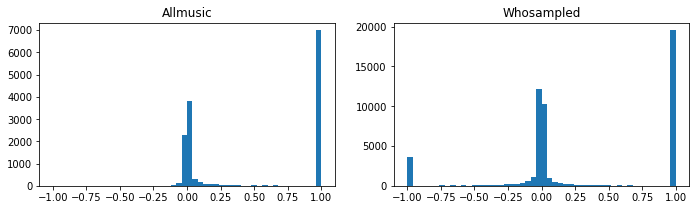

In [0]:
plt.figure(figsize=(18, 3))

plt.subplot(131)
plt.hist(G_table_allmusic['disruption'],bins=50)
plt.title('Allmusic')
plt.subplot(132)
plt.hist(G_table_whosampled['disruption'],bins=50)
plt.title('Whosampled')
plt.show()

<br><p>Escolhendo apenas dados com ci menor que 0.05</p><br>

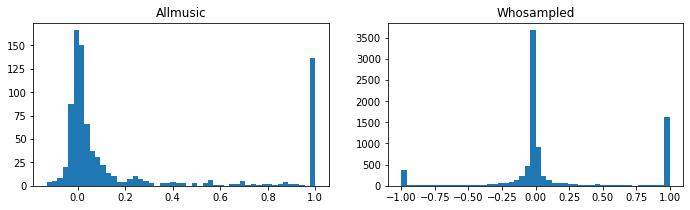

In [0]:
plt.figure(figsize=(18, 3))

plt.subplot(131)
plt.hist(G_table_allmusic[G_table_allmusic['ci']<0.05]['disruption'],bins=50)
plt.title('Allmusic')
plt.subplot(132)
plt.hist(G_table_whosampled[G_table_whosampled['ci']<0.05]['disruption'],bins=50)
plt.title('Whosampled')
plt.show()

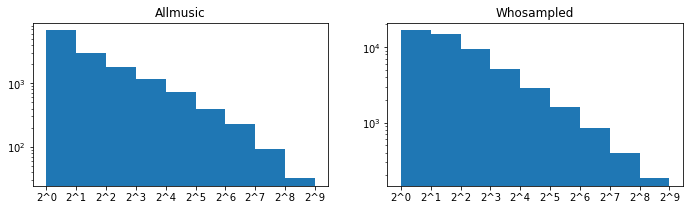

In [0]:
plt.figure(figsize=(18, 3))

from statsmodels.distributions.empirical_distribution import ECDF
data = G_table_allmusic['in']
ecdf = ECDF(data)
plt.loglog(ecdf.x, 1-ecdf.y)


bins = range(10)

plt.subplot(131)
plt.xticks(bins, ["2^" + str(i) for i in bins])
plt.hist(np.log2(G_table_allmusic['in']), log=True, bins=bins)
plt.title('Allmusic')
plt.subplot(132)

plt.xticks(bins, ["2^" + str(i) for i in bins])
plt.hist(np.log2(G_table_whosampled['in']), log=True, bins=bins)
plt.title('Whosampled')
plt.show()

<br><h4>Top sampled tracks</h4><br>

<p>The most sampled tracks</p><br>

In [0]:
G_track = at.build_track_graph_who_sampled(who_sampled_json)

In [0]:
print("Vértices: ", G_track.number_of_nodes(),"\nArestas: ",G_track.number_of_edges())

Vértices:  387913 
Arestas:  407620


In [0]:
for node in G_track.nodes:
    G_track.nodes[node]['genres'] = {}

In [0]:
degree_dict = dict(G_track.in_degree())
degree_table = pd.DataFrame(degree_dict.values(), columns=['degree'], index = degree_dict.keys())
degree_table.sort_values(by='degree', ascending=False).head(10)

,degree
"Amen, Brother",3206
Think (About It),1531
Change the Beat (Female Version),1326
Funky Drummer,798
Synthetic Substitution,504
Long Red,487
Impeach the President,481
La Di Da Di,481
Funky President (People It's Bad),439
The Champ,427


In [0]:
top_10_indegree_whosampled_site = {'Amen, Brother','Think (About It)','Change the Beat (Female Version)','Funky Drummer','La Di Da Di',"Funky President (People It's Bad)",'Bring the Noise','Synthetic Substitution','Impeach the President','Here We Go (Live at the Funhouse)'}
print('Intersection between the 10 most sampled tracks on site and the 15 most sampled tracks on dataset:\n',len(top_10_indegree_whosampled_site.intersection(set(degree_table.sort_values(by='degree', ascending=False).head(15).index))))

Intersection between the 10 most sampled tracks on site and the 15 most sampled tracks on dataset:
 10
